In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from zipfile import ZipFile
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import os
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
d = 3
l = 32
n = l
m = 2 * l
i0, j0 = [n // 2, m // 2]
cc_list = []

x = np.linspace(0, m, m)
y = np.linspace(0, n, n)
X, Y = np.meshgrid(x, y)

y_p = np.linspace(0, n, 1000)

N = 50
eta_list = ['-1', '-0.5', '-0.25', '-0.1', '0', '0.05', '0.1', '0.25', '0.5', '1']
V0_list = np.arange(0.25, 2, 0.5)

In [ ]:
cc_lists = {eta: {} for eta in eta_list}
for eta in eta_list:
    eta_cc = [[[] for i in range(N)] for i in range(len(V0_list))]
    for i, V0 in enumerate(V0_list):
        for j in range(N):
            file_path = f'data_new/data/{j + 1}_{eta}_{V0:.2f}'
            if os.path.getsize(file_path) > 0:
                with open(file_path, 'rb') as file:
                    cc = pickle.load(file)
                    eta_cc[i][j].append(cc)
            else:
                print(file_path)
                new_path = f'data/{j}_{eta}_{V0:.2f}'
                with open(new_path, 'rb') as file:
                    cc = pickle.load(file)
                    eta_cc[i][j].append(cc)
    file_path = f'data_new/data/{0}_{eta}_{0:.2f}'
    with open(file_path, 'rb') as file:
        cc = pickle.load(file)
    cc_lists[eta][0.00] = cc
    for i, V0 in enumerate(V0_list):
        cc_lists[eta][V0] = np.mean(np.array(eta_cc[i]), axis=0)

#file_path = f'{0}_{0}_{0:.2f}'
#with open(file_path, 'rb') as file:
    #cc = pickle.load(file)
#cc_lists['0'][0.00] = cc

data_new/data/29_0_0.75


In [ ]:
def proximity(r, r0, beta):
  return r0 / r ** beta

In [ ]:
def anti_proximity(r, r0, a):
  return -a * np.exp(-r/r0) + 0.085

In [ ]:
r = np.linspace(1, n - 1, n - 1)
r_ = np.linspace(1, n - 1, n - 1)

In [ ]:
colors_1 =  [
            "#603ba5",
			"#0c9e91",
			"#ff5252",
			"#ffc62a",
			"#cf418d",
			"#23a4e0",
			"#b36ad8",
            "#1f6482"
		]

In [ ]:
def quad_func(eta, y):
    return j0 + eta * (y_p - i0) ** 2

In [ ]:
x_p = quad_func(0.5, y_p)

Text(0.4, 3, '2l')

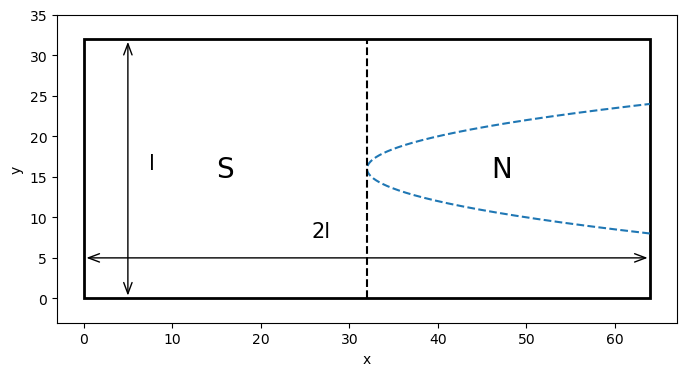

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_p[x_p <= m], y_p[x_p <= m], '--')
ax.set_xlim(-d, m + d)
ax.set_ylim(-d, n + d)
ax.set_xlabel('x')
ax.set_ylabel('y')
rect = Rectangle((0, 0), m, n, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)
ax.vlines(32, 0, 32, ls = '--', color = 'black')
ax.text(n // 2 - 1, n // 2 - 1, 'S', fontsize=20)
ax.text(n + n // 2 - 2, n // 2 - 1, 'N', c='black', fontsize=20)

arr1 = mpatches.FancyArrowPatch((5, 0), (5, n), arrowstyle='<->,head_width=.15', mutation_scale=20)
ax.add_patch(arr1)
ax.annotate("l", (3, .5), xycoords=arr1, fontsize=15)

arr2 = mpatches.FancyArrowPatch((0, 5), (m, 5), arrowstyle='<->,head_width=.15', mutation_scale=20)
ax.add_patch(arr2)
ax.annotate("2l", (.4, 3), xycoords=arr2, fontsize=15)

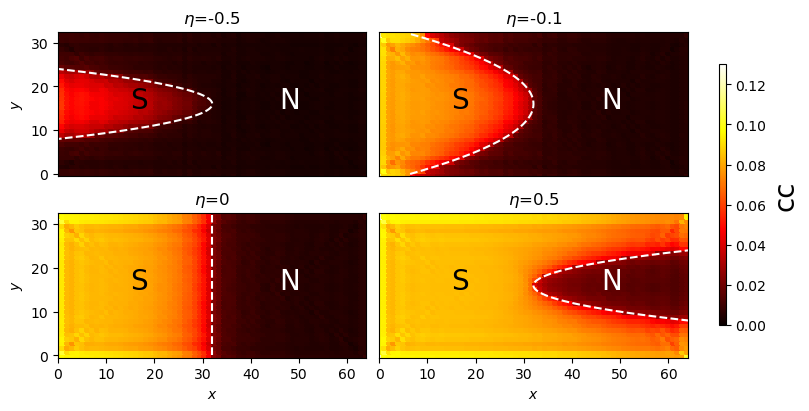

In [ ]:
V0 = 0.00
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), constrained_layout=True)

# Список для хранения объектов графиков
mapp_list = []

for i, eta in enumerate(['-0.5', '-0.1', '0', '0.5']):
    cc = cc_lists[eta][V0]
    mapp = ax[i // 2, i % 2].pcolormesh(
        X, Y, cc.reshape((n, m)), cmap='hot', edgecolor='face', shading='auto', vmin=0, vmax=0.13
    )
    mapp_list.append(mapp)  # Сохраняем для общего colorbar
    ax[i // 2, i % 2].text(n // 2 - 1, n // 2 - 1, 'S', fontsize=20)
    ax[i // 2, i % 2].text(n + n // 2 - 2, n // 2 - 1, 'N', c='w', fontsize=20)
    if i >= 2:
        ax[i // 2, i % 2].set_xlabel('$x$')
    if i == 0 or i == 2:
        ax[i // 2, i % 2].set_ylabel('$y$')
    ax[i // 2, i % 2].set_title(r'$\eta$' + '=' + eta)
    ax[i // 2, i % 2].plot(quad_func(float(eta), y_p), y_p, '--', c='w')
    ax[i // 2, i % 2].set_xlim(0, m)

# Убираем тики на осях y и x там, где это не нужно
for i in range(2):
    for j in range(2):
        if j == 1:  # Убираем оси y справа
            ax[i, j].tick_params(axis='y', left=False, labelleft=False)
        if i == 0:
            ax[i, j].tick_params(axis='x', bottom=False, labelbottom=False)

cbar = fig.colorbar(mapp_list[0], ax=ax, location='right', shrink=0.8, aspect=40)
cbar.set_label('сс', fontsize=20)

plt.show()

0.0469259473934266
0.07816379592068595
0.0833001467330376
0.08457790316819273
0.08478225918871352


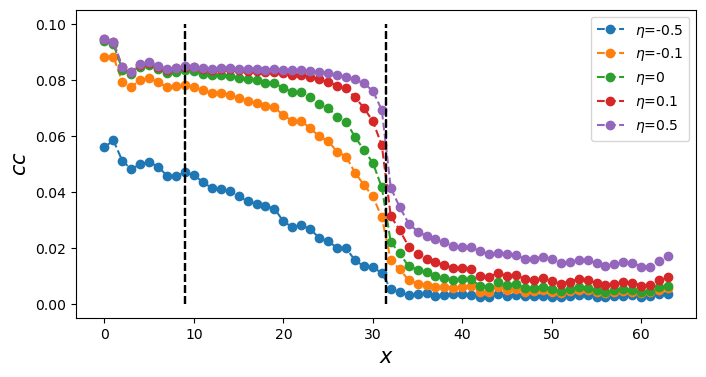

In [ ]:
V0 = 0.00
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    cc = cc_lists[eta][V0]
    print(cc.reshape(n, m)[i0, 9])
    ax.plot(cc.reshape(n , m)[i0, :], '--o', label=(r'$\eta$' + '=' + str(eta)))
    ax.legend()
    ax.vlines(31.5, 0, 0.1, ls = '--', color = 'black')
    ax.vlines(9, 0, 0.1, ls = '--', color = 'black')
    ax.set_xlabel('$x$', fontsize=15)
    ax.set_ylabel('$cc$', fontsize=15)

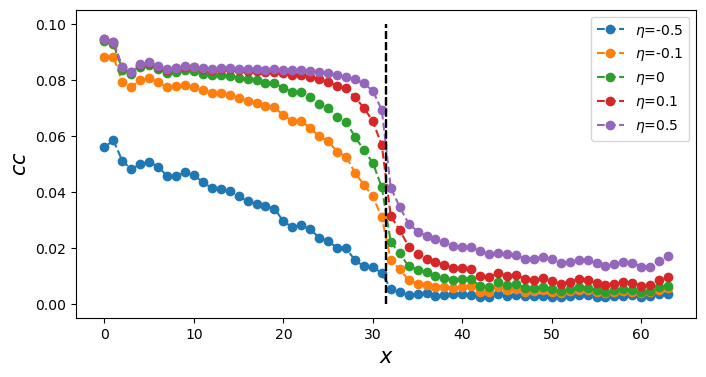

In [ ]:
V0 = 0.00
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    cc = cc_lists[eta][V0]
    #print(cc.reshape(n, m)[i0, 9])
    ax.plot(cc.reshape(n , m)[i0, :], '--o', label=(r'$\eta$' + '=' + str(eta)))
    ax.legend()
    ax.vlines(31.5, 0, 0.1, ls = '--', color = 'black')
    #ax.vlines(9, 0, 0.1, ls = '--', color = 'black')
    ax.set_xlabel('$x$', fontsize=15)
    ax.set_ylabel('$cc$', fontsize=15)

In [ ]:
'''
def ex(r, f0, beta):
  return f0 / -r ** beta

f01_eta_list_pure = {}
beta1_eta_list_pure = {}
#c_eta_list_pure = {}
V0 = 0.00

for i, eta in enumerate(eta_list):
    cc = cc_lists[eta][V0]
    coefs, _ = curve_fit(ex, r_, cc.reshape(n , m)[i0, j0 - 1:0:-1], maxfev=10000)
    f01_eta_list_pure[eta] = coefs[0]
    beta1_eta_list_pure[eta] = coefs[1]

r1 = np.linspace(0, n - 1, n)
r2 = np.linspace(n, m - 1, n)
fig = plt.figure(figsize=(8, 4))
eta = '-0.1'
V0 = 0.00
cc = cc_lists[eta][V0]
plt.plot(r1, cc.reshape(n , m)[i0, :j0], 'o', c=colors_1[3])
plt.plot(r2, cc.reshape(n , m)[i0, j0:], 'o', c=colors_1[3])
plt.plot(r_ , ex(r_, f01_eta_list_pure[eta], beta1_eta_list_pure[eta])[::-1], c=colors_1[0])
plt.plot(r2[1:], proximity(r, f0_eta_list_pure[eta], beta_eta_list_pure[eta]), c=colors_1[0])
plt.vlines(31.5, 0, 0.1, ls = '--', color = 'black')
plt.title(r'$\eta$' + f'={eta}', fontsize=21)
plt.annotate(r'$\frac{f_{0}}{-r^\beta}$', fontsize=18, xy=(20, cc.reshape(n , m)[i0, 20]), xytext=(6, 0.04), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
plt.annotate(r'$\frac{f_{0}}{r^\beta}$', fontsize=18, xy=(50, cc.reshape(n , m)[i0, 50]), xytext=(40, 0.06), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$cc$', fontsize=15)
'''

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\user\AppData\Local\Temp\ipykernel_11744\762624841.py:1: SyntaxWarning: invalid escape sequence '\e'
  '''


"\ndef ex(r, f0, beta):\n  return f0 / -r ** beta\n\nf01_eta_list_pure = {}\nbeta1_eta_list_pure = {}\n#c_eta_list_pure = {}\nV0 = 0.00\n\nfor i, eta in enumerate(eta_list):\n    cc = cc_lists[eta][V0]\n    coefs, _ = curve_fit(ex, r_, cc.reshape(n , m)[i0, j0 - 1:0:-1], maxfev=10000)\n    f01_eta_list_pure[eta] = coefs[0]\n    beta1_eta_list_pure[eta] = coefs[1]\n\nr1 = np.linspace(0, n - 1, n)\nr2 = np.linspace(n, m - 1, n)\nfig = plt.figure(figsize=(8, 4))\neta = '-0.1'\nV0 = 0.00\ncc = cc_lists[eta][V0]\nplt.plot(r1, cc.reshape(n , m)[i0, :j0], 'o', c=colors_1[3])\nplt.plot(r2, cc.reshape(n , m)[i0, j0:], 'o', c=colors_1[3])\nplt.plot(r_ , ex(r_, f01_eta_list_pure[eta], beta1_eta_list_pure[eta])[::-1], c=colors_1[0])\nplt.plot(r2[1:], proximity(r, f0_eta_list_pure[eta], beta_eta_list_pure[eta]), c=colors_1[0])\nplt.vlines(31.5, 0, 0.1, ls = '--', color = 'black')\nplt.title(r'$\\eta$' + f'={eta}', fontsize=21)\nplt.annotate(r'$\x0crac{f_{0}}{-r^\x08eta}$', fontsize=18, xy=(20, cc.r

In [ ]:
f0_eta_list_pure = {}
beta_eta_list_pure = {}
V0 = 0.00

for i, eta in enumerate(eta_list):
    cc = cc_lists[eta][V0]
    coefs, _ = curve_fit(proximity, r, cc.reshape(n , m)[i0, j0 + 1:], maxfev=10000)
    f0_eta_list_pure[eta] = coefs[0]
    beta_eta_list_pure[eta] = coefs[1]

In [ ]:
r0_eta_list_pure = {}
a_eta_list_pure = {}
#c_eta_list_pure = {}
V0 = 0.00

for i, eta in enumerate(eta_list):
  cc = cc_lists[eta][V0]
  coefs, _ = curve_fit(anti_proximity, r_, cc.reshape(n , m)[i0, j0 - 1:0:-1], p0=[1, 0], maxfev=50000)
  r0_eta_list_pure[eta] = coefs[0]
  a_eta_list_pure[eta] = coefs[1]
  #c_eta_list_pure[eta] = coefs[2]

Text(0, 0.5, '$cc$')

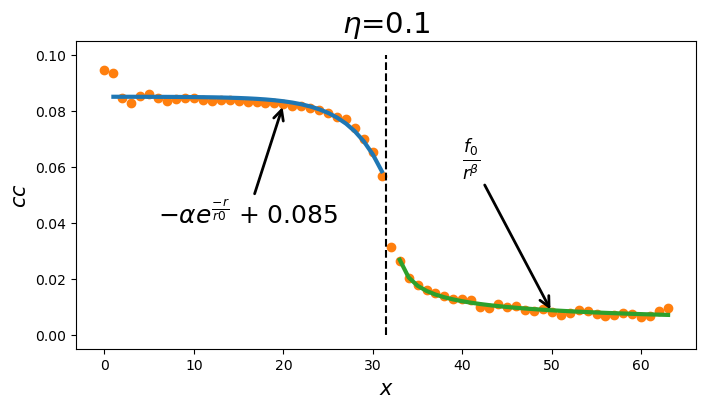

In [ ]:
r1 = np.linspace(0, n - 1, n)
r2 = np.linspace(n, m - 1, n)
fig = plt.figure(figsize=(8, 4))
eta = '0.1'
V0 = 0.00
cc = cc_lists[eta][V0]
plt.plot(list(r1) + list(r2), list(cc.reshape(n , m)[i0, :j0]) + list(cc.reshape(n , m)[i0, j0:]), 'o', c='#ff7f0e', ms=6)
plt.plot(r_ , anti_proximity(r_, r0_eta_list_pure[eta], a_eta_list_pure[eta])[::-1], c='#1f77b4', lw=3)
plt.plot(r2[1:], proximity(r, f0_eta_list_pure[eta], beta_eta_list_pure[eta]), c='#2ca02c', lw=3)
plt.vlines(31.5, 0, 0.1, ls = '--', color = 'black')
plt.title(r'$\eta$' + f'={eta}', fontsize=21)
plt.annotate(r'$-\alpha$$e^\frac{-r}{r0}$ + 0.085', fontsize=18, xy=(20, cc.reshape(n , m)[i0, 20]), xytext=(6, 0.04), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
plt.annotate(r'$\frac{f_{0}}{r^\beta}$', fontsize=18, xy=(50, cc.reshape(n , m)[i0, 50]), xytext=(40, 0.06), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$cc$', fontsize=15)

Text(0.5, 0, '$\\eta$')

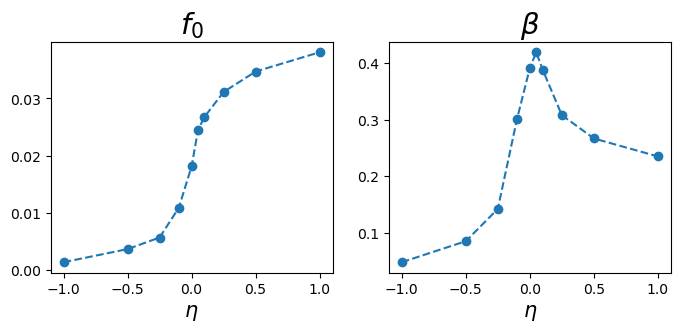

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(list(map(float, eta_list)), list(f0_eta_list_pure.values()), 'o--')
ax[0].set_title(r'$f_{0}$', fontsize=21)
ax[1].plot(list(map(float, eta_list)), list(beta_eta_list_pure.values()), 'o--')
ax[1].set_title(r'$\beta$', fontsize=21)
ax[0].set_xlabel(r'$\eta$', fontsize=15)
ax[1].set_xlabel(r'$\eta$', fontsize=15)

Text(0.5, 0, '$\\eta$')

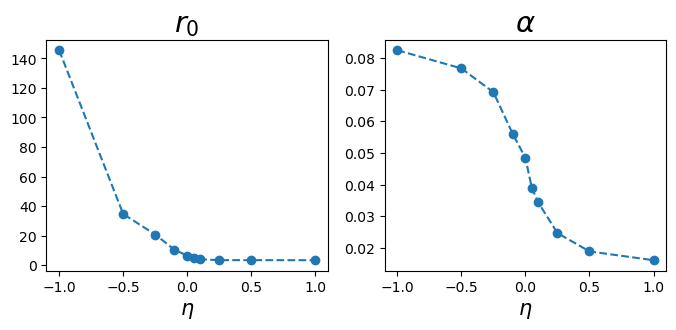

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(list(map(float, eta_list)), list(r0_eta_list_pure.values()), 'o--')
ax[0].set_title(r'$r_{0}$', fontsize=21)
ax[1].plot(list(map(float, eta_list)), list(a_eta_list_pure.values()), 'o--')
ax[1].set_title(r'$\alpha$', fontsize=21)
#ax[2].plot(list(map(float, eta_list)), c_eta_list_pure.values(), 'o--', c=colors_1[0])
#ax[2].set_title(r'$c$', fontsize=25)
ax[0].set_xlabel(r'$\eta$', fontsize=15)
ax[1].set_xlabel(r'$\eta$', fontsize=15)
#ax[2].set_xlabel(r'$\eta$')

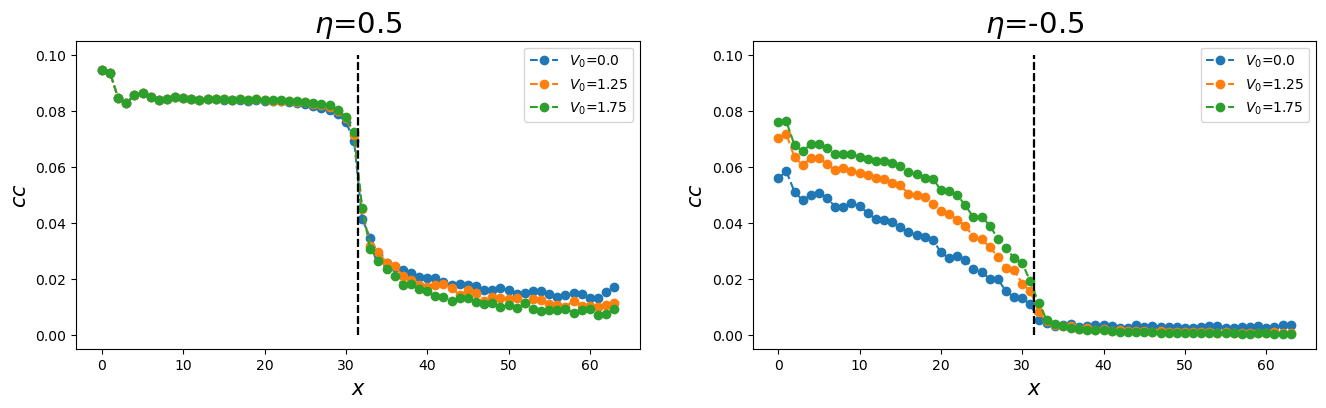

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

for j, V0 in enumerate([0.0, 1.25, 1.75]):
    cc = cc_lists['0.5'][V0]
    ax[0].plot(cc.reshape(n , m)[i0, :], '--o', label=(r'$V_{0}$' + '=' + str(V0)))
    ax[0].legend()
    ax[0].set_title(r'$\eta$' + '=' + '0.5', fontsize=21)
    ax[0].vlines(31.5, 0, 0.1, ls = '--', color = 'black')
    ax[0].set_xlabel('$x$', fontsize=15)
    ax[0].set_ylabel('$cc$', fontsize=15)
    cc = cc_lists['-0.5'][V0]
    ax[1].plot(cc.reshape(n , m)[i0, :], '--o', label=(r'$V_{0}$' + '=' + str(V0)))
    ax[1].legend()
    ax[1].set_title(r'$\eta$' + '=' + '-0.5', fontsize=21)
    ax[1].vlines(31.5, 0, 0.1, ls = '--', color = 'black')
    ax[1].set_xlabel('$x$', fontsize=15)
    ax[1].set_ylabel('$cc$', fontsize=15)

In [ ]:
f0_list = {eta: {} for eta in eta_list}
beta_list = {eta: {} for eta in eta_list}
for i, eta in enumerate(eta_list):
    for j, V0 in enumerate([0.00] + list(V0_list)):
        cc = cc_lists[eta][V0]
        coefs, _ = curve_fit(proximity, r, cc.reshape(n , m)[i0, j0 + 1:])
        f0_list[eta][V0] = coefs[0]
        beta_list[eta][V0] = coefs[1]

In [ ]:
r0_list = {eta: {} for eta in eta_list}
a_list = {eta: {} for eta in eta_list}
#c_list = {eta: {} for eta in eta_list}
for i, eta in enumerate(eta_list):
    for j, V0 in enumerate([0.00] + list(V0_list)):
        cc = cc_lists[eta][V0]
        coefs, _ = curve_fit(anti_proximity, r_, cc.reshape(n , m)[i0, j0-1:0: -1], p0=[1, 0], maxfev=50000)
        r0_list[eta][V0] = coefs[0]
        a_list[eta][V0] = coefs[1]
        #c_list[eta][V0] = coefs[2]

Text(0, 0.5, '$cc$')

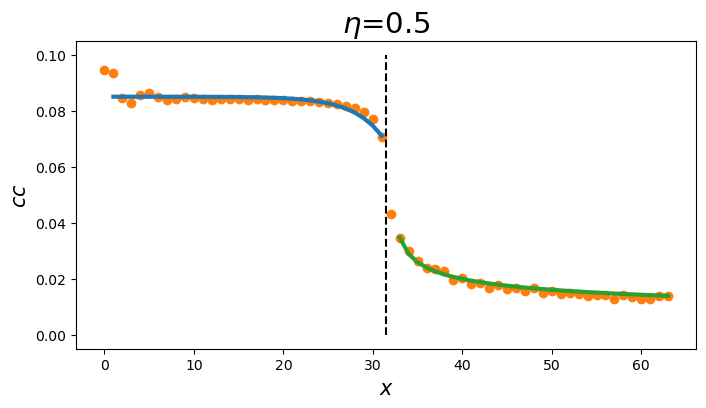

In [ ]:
r1 = np.linspace(0, n - 1, n)
r2 = np.linspace(n, m - 1, n)
fig = plt.figure(figsize=(8, 4))
eta = '0.5'
V0 = 0.75
cc = cc_lists[eta][V0]
plt.plot(list(r1) + list(r2), list(cc.reshape(n , m)[i0, :j0]) + list(cc.reshape(n , m)[i0, j0:]), 'o', c='#ff7f0e', ms=6)
plt.plot(r_ , anti_proximity(r_, r0_eta_list_pure[eta], a_eta_list_pure[eta])[::-1], c='#1f77b4', lw=3)
plt.plot(r2[1:], proximity(r, f0_eta_list_pure[eta], beta_eta_list_pure[eta]), c='#2ca02c', lw=3)
plt.vlines(31.5, 0, 0.1, ls = '--', color = 'black')
plt.title(r'$\eta$' + f'={eta}', fontsize=21)
#plt.annotate(r'$-\alpha$$e^\frac{-r}{r0}$ + 0.085', fontsize=18, xy=(20, cc.reshape(n , m)[i0, 20]), xytext=(6, 0.04), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
#plt.annotate(r'-$\frac{f_{0}}{r^\beta}$', fontsize=18, xy=(50, cc.reshape(n , m)[i0, 50]), xytext=(40, 0.06), arrowprops=dict(arrowstyle='->', color='black', linewidth=2))
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$cc$', fontsize=15)

In [ ]:
f0_eta = {V0: [f0_list[eta][V0] for eta in eta_list] for V0 in [0.00] + list(V0_list)}
beta_eta = {V0: [beta_list[eta][V0] for eta in eta_list] for V0 in [0.00] + list(V0_list)}

In [ ]:
r0_eta = {V0: [r0_list[eta][V0] for eta in eta_list] for V0 in [0.00] + list(V0_list)}
a_eta = {V0: [a_list[eta][V0] for eta in eta_list] for V0 in [0.00] + list(V0_list)}

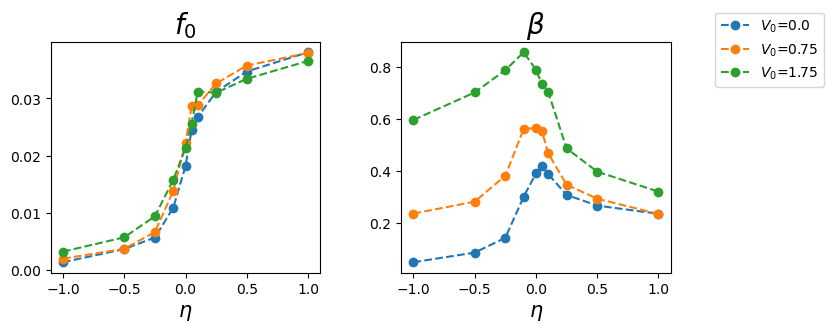

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, V0 in enumerate([0.00, 0.75, 1.75]):
    ax[0].plot(list(map(float, eta_list)), f0_eta[V0], 'o--', label=r'$V_{0}$=' + str(V0))
    ax[0].set_title(r'$f_{0}$', fontsize=20)
    ax[1].plot(list(map(float, eta_list)), beta_eta[V0], 'o--')
    ax[1].set_title(r'$\beta$', fontsize=20)
    ax[0].set_xlabel(r'$\eta$', fontsize=15)
    ax[1].set_xlabel(r'$\eta$', fontsize=15)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

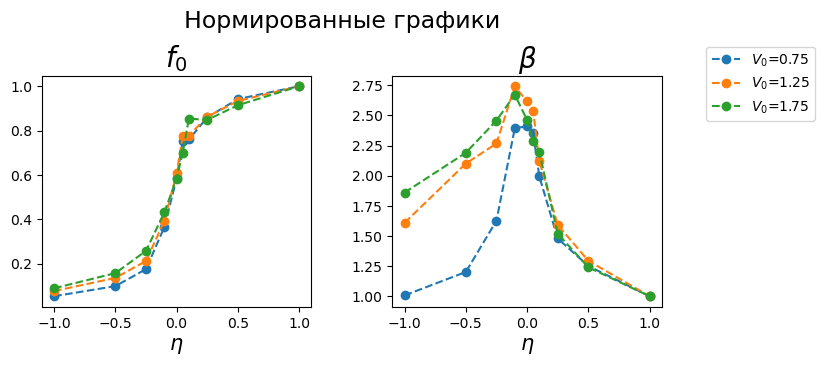

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, V0 in enumerate([0.75, 1.25, 1.75]):
    ax[0].plot(list(map(float, eta_list)), f0_eta[V0] / f0_eta[V0][-1], 'o--', label=r'$V_{0}$=' + str(V0))
    ax[0].set_title(r'$f_{0}$', fontsize=20)
    ax[1].plot(list(map(float, eta_list)), beta_eta[V0] / beta_eta[V0][-1], 'o--')
    ax[1].set_title(r'$\beta$', fontsize=20)
    ax[0].set_xlabel(r'$\eta$', fontsize=15)
    ax[1].set_xlabel(r'$\eta$', fontsize=15)
plt.suptitle(r'Нормированные графики', fontsize=17, y=1.1)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

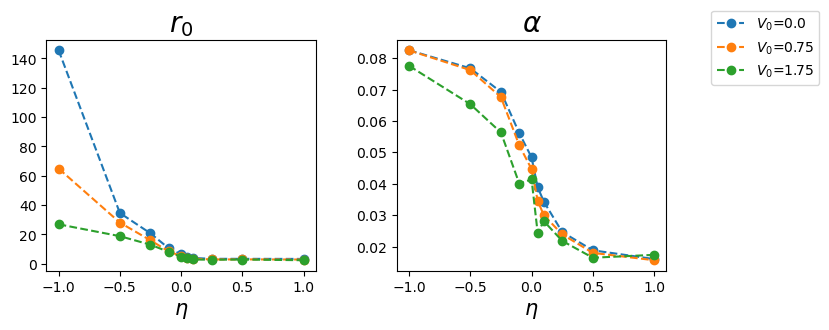

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, V0 in enumerate([0.00, 0.75, 1.75]):
    ax[0].plot(list(map(float, eta_list)), r0_eta[V0], 'o--', label=r'$V_{0}$=' + str(V0))
    ax[0].set_title(r'$r_{0}$', fontsize=20)
    ax[1].plot(list(map(float, eta_list)), a_eta[V0], 'o--')
    ax[1].set_title(r'$\alpha$', fontsize=20)
    ax[0].set_xlabel(r'$\eta$', fontsize=15)
    ax[1].set_xlabel(r'$\eta$', fontsize=15)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

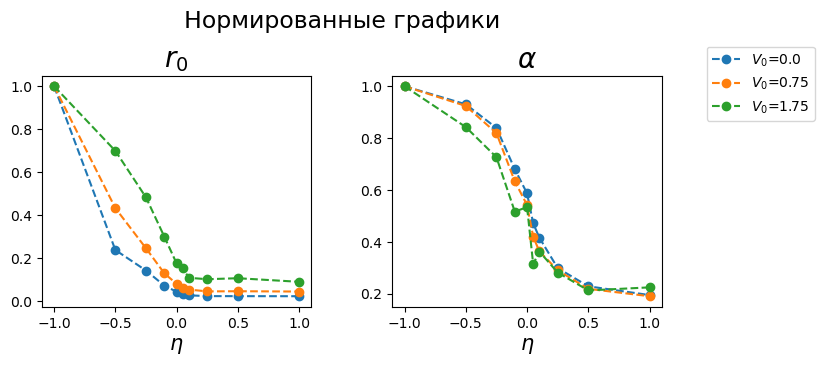

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, V0 in enumerate([0.00, 0.75, 1.75]):
    ax[0].plot(list(map(float, eta_list)), r0_eta[V0] / r0_eta[V0][0], 'o--', label=r'$V_{0}$=' + str(V0))
    ax[0].set_title(r'$r_{0}$', fontsize=20)
    ax[1].plot(list(map(float, eta_list)), a_eta[V0] / a_eta[V0][0], 'o--')
    ax[1].set_title(r'$\alpha$', fontsize=20)
    ax[0].set_xlabel(r'$\eta$', fontsize=15)
    ax[1].set_xlabel(r'$\eta$', fontsize=15)
plt.suptitle(r'Нормированные графики', fontsize=17, y=1.1)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

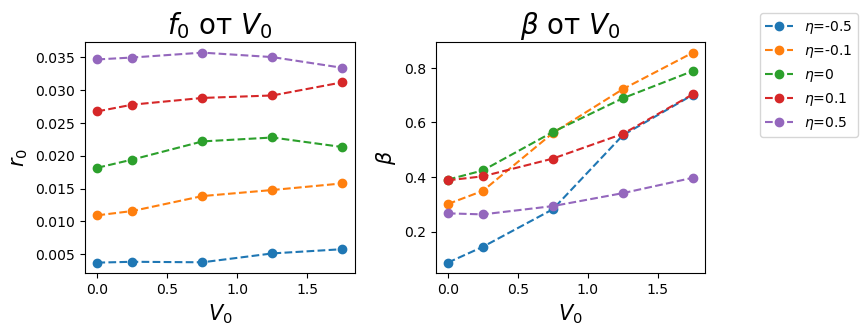

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    ax[0].plot([0.00] + list(V0_list), np.array(list(f0_list[eta].values())), 'o--', label=(r'$\eta$' + '=' + f'{eta}'))
    ax[0].set_title(r'$f_{0}$ от $V_{0}$', fontsize=20)
    ax[0].set_xlabel('$V_{0}$', fontsize=15)
    ax[0].set_ylabel(r'$r_{0}$', fontsize=15)
    #ax[0].set_yticks(np.arange(0.01, 0.07, 0.01))
    ax[1].plot([0.00] + list(V0_list), np.array(list(beta_list[eta].values())), 'o--')
    ax[1].set_title(r'$\beta$ от $V_{0}$', fontsize=20)
    ax[1].set_xlabel('$V_{0}$', fontsize=15)
    ax[1].set_ylabel(r'$\beta$', fontsize=15)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

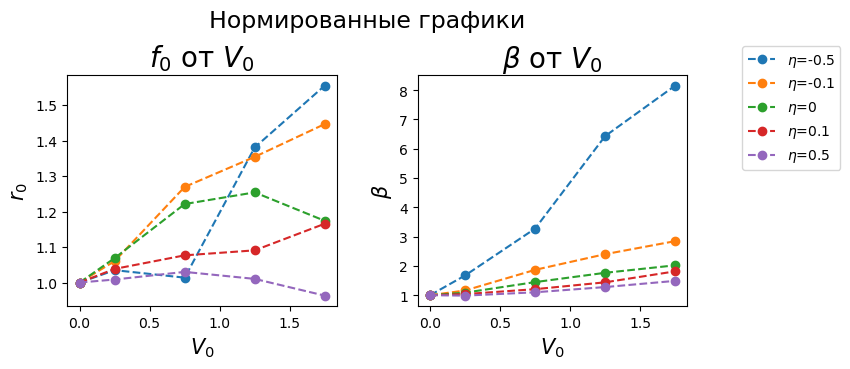

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    ax[0].plot([0.00] + list(V0_list), np.array(list(f0_list[eta].values())) / np.array(list(f0_list[eta].values()))[0], 'o--', label=(r'$\eta$' + '=' + f'{eta}'))
    ax[0].set_title(r'$f_{0}$ от $V_{0}$', fontsize=20)
    ax[0].set_xlabel('$V_{0}$', fontsize=15)
    ax[0].set_ylabel(r'$r_{0}$', fontsize=15)
    #ax[0].set_yticks(np.arange(0.01, 0.07, 0.01))
    ax[1].plot([0.00] + list(V0_list), np.array(list(beta_list[eta].values())) / np.array(list(beta_list[eta].values()))[0], 'o--')
    ax[1].set_title(r'$\beta$ от $V_{0}$', fontsize=20)
    ax[1].set_xlabel('$V_{0}$', fontsize=15)
    ax[1].set_ylabel(r'$\beta$', fontsize=15)
plt.suptitle(r'Нормированные графики', fontsize=17, y=1.1)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

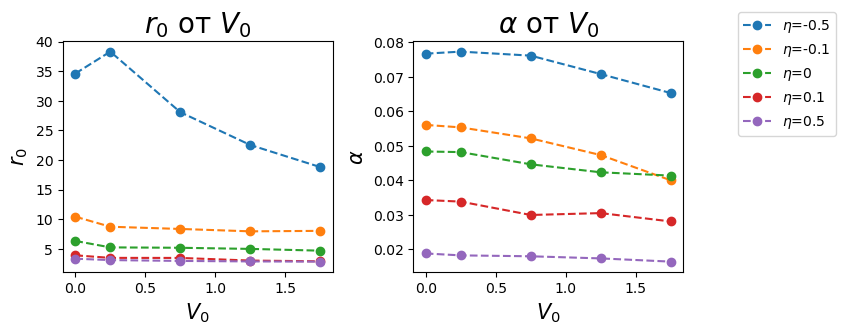

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    ax[0].plot([0.00] + list(V0_list), np.array(list(r0_list[eta].values())), 'o--', label=(r'$\eta$' + '=' + f'{eta}'))
    ax[0].set_title(r'$r_{0}$ от $V_{0}$', fontsize=20)
    ax[0].set_xlabel('$V_{0}$', fontsize=15)
    ax[0].set_ylabel(r'$r_{0}$', fontsize=15)
    #ax[0].set_yticks(np.arange(0.01, 0.07, 0.01))
    ax[1].plot([0.00] + list(V0_list), np.array(list(a_list[eta].values())), 'o--')
    ax[1].set_title(r'$\alpha$ от $V_{0}$', fontsize=20)
    ax[1].set_xlabel('$V_{0}$', fontsize=15)
    ax[1].set_ylabel(r'$\alpha$', fontsize=15)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)

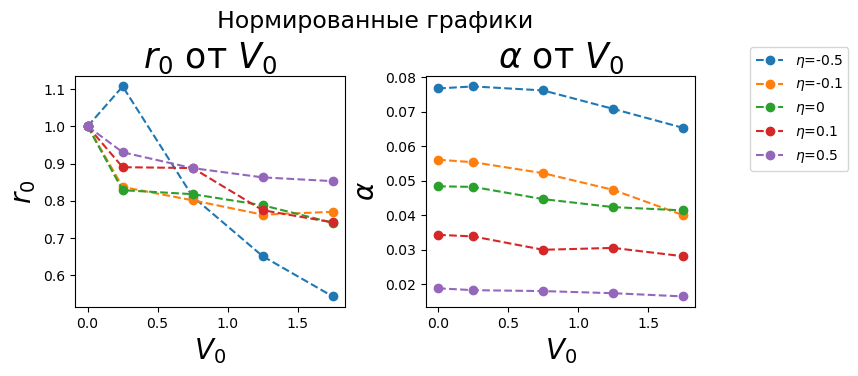

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for i, eta in enumerate(['-0.5', '-0.1', '0', '0.1', '0.5']):
    ax[0].plot([0.00] + list(V0_list), np.array(list(r0_list[eta].values())) / np.array(list(r0_list[eta].values()))[0], 'o--', label=(r'$\eta$' + '=' + f'{eta}'))
    ax[0].set_title(r'$r_{0}$ от $V_{0}$', fontsize=25)
    ax[0].set_xlabel('$V_{0}$', fontsize=20)
    ax[0].set_ylabel(r'$r_{0}$', fontsize=20)
    #ax[0].set_yticks(np.arange(0.01, 0.07, 0.01))
    ax[1].plot([0.00] + list(V0_list), np.array(list(a_list[eta].values())), 'o--')
    ax[1].set_title(r'$\alpha$ от $V_{0}$', fontsize=25)
    ax[1].set_xlabel('$V_{0}$', fontsize=20)
    ax[1].set_ylabel(r'$\alpha$', fontsize=20)
plt.suptitle(r'Нормированные графики', fontsize=17, y=1.1)
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(wspace=0.3)